# Sci-kit Learn Basics
Cover the basics of using models in the scikit learn package.

https://scikit-learn.org/stable/modules/classes.html#

## Datasets
Scikit-Learn comes with a few standard datasets to use.

https://scikit-learn.org/stable/datasets/toy_dataset.html

In [2]:
import pandas as pd  # Load into pandas dataframe
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris # Import for accessing datasets

iris = load_iris()

# Using this loaded data to make 70/30 training/testing split
x_train, x_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=.3, random_state=42
)


Conversly, here is how you would create the train test split using a provided dataset

In [3]:
# Load the dataframe
df = pd.read_csv("sample_dataset.txt", sep='	')

# Seperate features (X) and target (y)
x = df.iloc[:, :-1]  # All rows for all but the last column
y = df.iloc[:, -1]  # All rows for just the last column

print(x.shape, y.shape)

# Get testing & training splits
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

(1999, 7) (1999,)


## Functions with all ML Models in Sci-kit Learn
- model = **modelName(*parameters*)**
- model.**fit(*x_train, y_train*)**
- y_pred = model.**predict(*x_test*)**
- model.**score(*x_test*, *y_test*)**

In [4]:
# Making a dummy model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()  # Default arguments
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Evaluation Metrics
(Confusion Matrix, Classification Report, Cross Validation Test (CVT))

## Confusion Matrix

[[157   0   0   0]
 [  0 141   7   0]
 [  1   1 142   1]
 [  1   0   2 147]]


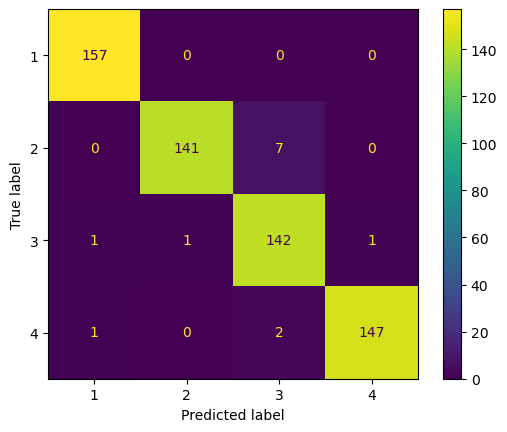

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Getting the confusion matrix object
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Creating the cool-looking graphical representation thing
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)
plt.show()

## Classification Report
Assesses the quality of the predictions using precision, recall, and f-score metrics

In [6]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99       157
           2       0.99      0.95      0.97       148
           3       0.94      0.98      0.96       145
           4       0.99      0.98      0.99       150

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



## Cross Validation Test
Splits the data up into 'k' different folds, testing each fold as it's own validation test as the rest are training sets.

In [7]:
from sklearn.model_selection import cross_val_score

result = cross_val_score(model, x, y, cv=10)  # Using 10 'folds'

print("Average Accuracy: ", result.mean())

Average Accuracy:  0.9759874371859297


## Independent vs. Self Test
- **Independent Test**: When you split the data into testing and training and they have no overlap.
- **Self Test**: You use the model on the training dataset to test the validity of the model. If it is a low accuracy, you know just to scrap the model there.

## GridSearchCV
Used for testing numerous parameters for a model

In [8]:
from sklearn.model_selection import GridSearchCV

# Define different parameter lists in dictionary
param_grid = {
    "n_neighbors": [i for i in range(50)]
}

# Make a grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit to the data
grid_search.fit(x_train, y_train)

# Find the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)
best_model = grid_search.best_estimator_  # Model with optimizing parameters

Best Parameters: {'n_neighbors': 4}
Best Score:  0.9857091653865847


c:\Users\jairi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jairi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jairi\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 213, in fit
    self._validate_params()
  File "c:\Users\jairi\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\jairi\anaconda3\Lib\site

### Making Algorithms Faster: n_jobs parameter
set n_jobs=-1 for faster execution. Basically just uses all cores of the cpu.